# Preparazione

## Installazione librerie

- Learning of different decision trees/classification algorithms with different parameters and gain formulas with the object of maximizing the performances (12 points)
- Decision trees interpretation (6 points)
- Decision trees validation with test and training set (6 points)
- Discussion of the best prediction model (6 points)

Risultati parziali:
- con tutti gli attributi stiamo sul 60% con tutti i modelli tranne random forest che tocca il 62%
- con i soli attributi sensati ...

In [1]:
#!pip install pydotplus

https://graphviz.gitlab.io/_pages/Download/Download_windows.html qua trovate graphviz, necessario per visualizzare i decision tree. Dovete scaricare lo zip, estrarlo e mettere qua sotto il percorso assoliuto della cartella bin

In [2]:
import os
os.environ['PATH'] += os.getcwd() + r'\graphviz-2.38\release\bin' + os.pathsep
#os.environ['PATH'] += r'C:\Users\Utente\Desktop\classification\graphviz-2.38\release\bin' + os.pathsep
print(os.environ['PATH'].split(';')[-2])

C:\Users\Utente\Documents\GitHub\Caravana-Data-Mining-UniPi\graphviz-2.38\release\bin


In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
import pydotplus
from sklearn import tree
from IPython.display import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from tqdm import tqdm_notebook as tqdm
from pandas import DataFrame
import seaborn as sn
import time
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

## Lettura Dataset

In [4]:
data = pd.read_csv('data/training_ready_no_regression.csv')
data.head()

,RefId,IsBadBuy,PurchDate,Auction,VehicleAge,Make,Model,Trim,SubModel,Color,...,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VNST,VehBCost,IsOnlineSale,WarrantyCost,ModelSimple,Doors,USRegion
0,326,1,10/25/2010,ADESA,2,KIA,SPECTRA,EX,SEDAN EX,BLUE,...,7535.0,9605.0,10650.0,FL,6100.0,0,533,SPECTRA,4D,South
1,42991,0,5/27/2009,MANHEIM,3,DODGE,STRATUS V6 2.7L V6 M,SXT,SEDAN SXT FFV,SILVER,...,6461.0,6418.0,7478.0,FL,4000.0,0,1630,STRATUS,4D,South
2,55273,0,3/18/2010,OTHER,2,DODGE,CALIBER,SE,WAGON,BLACK,...,8102.0,10721.0,11350.0,OK,7500.0,0,693,CALIBER,4D,South
3,29058,0,6/8/2009,OTHER,4,FORD,FREESTAR FWD V6 3.9L,S,PASSENGER 3.9L,BROWN,...,6658.0,5702.0,7691.0,AZ,4725.0,0,1633,FREESTAR,4D,West
4,34991,0,3/4/2009,MANHEIM,4,CHRYSLER,TOWN & COUNTRY FWD V,BAS,MINIVAN 3.3L,BLUE,...,6811.0,6300.0,7856.0,TX,5670.0,0,1623,TOWN & COUNTRY,4D,South


In [5]:
data.isnull().sum()

RefId                                  0
IsBadBuy                               0
PurchDate                              0
Auction                                0
VehicleAge                             0
Make                                   0
Model                                  0
Trim                                   0
SubModel                               0
Color                                  0
Transmission                           2
WheelType                              0
VehOdo                                 0
Nationality                            0
Size                                   0
TopThreeAmericanName                   0
MMRAcquisitionAuctionAveragePrice      0
MMRAcquisitionAuctionCleanPrice        0
MMRAcquisitionRetailAveragePrice       0
MMRAcquisitonRetailCleanPrice          0
MMRCurrentAuctionAveragePrice          0
MMRCurrentAuctionCleanPrice            0
MMRCurrentRetailAveragePrice           0
MMRCurrentRetailCleanPrice             0
VNST            

In [6]:
data = data.dropna()

In [7]:
data.isnull().sum()

RefId                                0
IsBadBuy                             0
PurchDate                            0
Auction                              0
VehicleAge                           0
Make                                 0
Model                                0
Trim                                 0
SubModel                             0
Color                                0
Transmission                         0
WheelType                            0
VehOdo                               0
Nationality                          0
Size                                 0
TopThreeAmericanName                 0
MMRAcquisitionAuctionAveragePrice    0
MMRAcquisitionAuctionCleanPrice      0
MMRAcquisitionRetailAveragePrice     0
MMRAcquisitonRetailCleanPrice        0
MMRCurrentAuctionAveragePrice        0
MMRCurrentAuctionCleanPrice          0
MMRCurrentRetailAveragePrice         0
MMRCurrentRetailCleanPrice           0
VNST                                 0
VehBCost                 

## Scelta attributi

In [8]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

,RefId,IsBadBuy,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VehBCost,IsOnlineSale,WarrantyCost
RefId,1,0.0260273,-0.0272809,-0.0244101,-0.00934808,-0.0137318,-0.0307202,-0.033245,-0.00720323,-0.0119329,-0.0206428,-0.0238117,-0.0116107,-0.0483487,-0.0248311
IsBadBuy,0.0260273,1,0.165989,0.0840642,-0.114665,-0.108398,-0.0923101,-0.0889483,-0.113858,-0.108998,-0.10841,-0.105306,-0.104491,-0.00440804,0.0484794
VehicleAge,-0.0272809,0.165989,1,0.318086,-0.592535,-0.54679,-0.48584,-0.452828,-0.593856,-0.551769,-0.523661,-0.49036,-0.320239,-0.0252917,0.25284
VehOdo,-0.0244101,0.0840642,0.318086,1,-0.0161708,0.0281536,0.0331587,0.0678348,-0.028381,0.0138318,0.0164099,0.0502884,-0.0630644,0.0309315,0.41429
MMRAcquisitionAuctionAveragePrice,-0.00934808,-0.114665,-0.592535,-0.0161708,1,0.989625,0.902936,0.902689,0.953192,0.947194,0.886236,0.885138,0.822926,0.0387939,-0.0458051
MMRAcquisitionAuctionCleanPrice,-0.0137318,-0.108398,-0.54679,0.0281536,0.989625,1,0.893285,0.910007,0.941155,0.949929,0.876718,0.887599,0.820049,0.0386397,-0.0136229
MMRAcquisitionRetailAveragePrice,-0.0307202,-0.0923101,-0.48584,0.0331587,0.902936,0.893285,1,0.989365,0.864072,0.860504,0.932654,0.924549,0.782545,0.0823726,-0.0497037
MMRAcquisitonRetailCleanPrice,-0.033245,-0.0889483,-0.452828,0.0678348,0.902689,0.910007,0.989365,1,0.861794,0.870014,0.925049,0.928278,0.787267,0.0795664,-0.0209404
MMRCurrentAuctionAveragePrice,-0.00720323,-0.113858,-0.593856,-0.028381,0.953192,0.941155,0.864072,0.861794,1,0.989905,0.911133,0.908353,0.795985,0.0387446,-0.0501831
MMRCurrentAuctionCleanPrice,-0.0119329,-0.108998,-0.551769,0.0138318,0.947194,0.949929,0.860504,0.870014,0.989905,1,0.903433,0.91713,0.795544,0.0391114,-0.0198652


In [9]:
# Eliminazioni dati rindondanti
del data['MMRCurrentRetailCleanPrice']
del data['MMRCurrentRetailAveragePrice']
del data['MMRCurrentAuctionCleanPrice']
del data['MMRCurrentAuctionAveragePrice']
del data['MMRAcquisitonRetailCleanPrice']
del data['MMRAcquisitionAuctionAveragePrice']
del data['MMRAcquisitionAuctionCleanPrice']
del data['MMRAcquisitionRetailAveragePrice']
del data['Model'] # c'è ModelSimple
del data['VNST'] # c'è USRegion

# Eliminazione dati irrilevanti
del data['RefId']
del data['PurchDate'] # ?
del data['IsOnlineSale']

# Eliminazioni dati con troppi valori unici
del data['SubModel']

In [10]:
data.head()

,IsBadBuy,Auction,VehicleAge,Make,Trim,Color,Transmission,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,VehBCost,WarrantyCost,ModelSimple,Doors,USRegion
0,1,ADESA,2,KIA,EX,BLUE,AUTO,COVERS,61184,ASIAN,MEDIUM,OTHER,6100.0,533,SPECTRA,4D,South
1,0,MANHEIM,3,DODGE,SXT,SILVER,AUTO,COVERS,92383,AMERICAN,MEDIUM,CHRYSLER,4000.0,1630,STRATUS,4D,South
2,0,OTHER,2,DODGE,SE,BLACK,AUTO,COVERS,45965,AMERICAN,MEDIUM,CHRYSLER,7500.0,693,CALIBER,4D,South
3,0,OTHER,4,FORD,S,BROWN,AUTO,COVERS,80169,AMERICAN,VAN,FORD,4725.0,1633,FREESTAR,4D,West
4,0,MANHEIM,4,CHRYSLER,BAS,BLUE,AUTO,ALLOY,77372,AMERICAN,VAN,CHRYSLER,5670.0,1623,TOWN & COUNTRY,4D,South


## Categorical Feature One Hot Encoding

As it stands, sklearn decision trees do not handle categorical data - see issue #5442. This approach of using Label Encoding converts to integers which the DecisionTreeClassifier() will treat as numeric. If your categorical data is not ordinal, this is not good - you'll end up with splits that do not make sense. Using a OneHotEncoder is the only current valid way, but is computationally expensive.

In [11]:
data.head()

,IsBadBuy,Auction,VehicleAge,Make,Trim,Color,Transmission,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,VehBCost,WarrantyCost,ModelSimple,Doors,USRegion
0,1,ADESA,2,KIA,EX,BLUE,AUTO,COVERS,61184,ASIAN,MEDIUM,OTHER,6100.0,533,SPECTRA,4D,South
1,0,MANHEIM,3,DODGE,SXT,SILVER,AUTO,COVERS,92383,AMERICAN,MEDIUM,CHRYSLER,4000.0,1630,STRATUS,4D,South
2,0,OTHER,2,DODGE,SE,BLACK,AUTO,COVERS,45965,AMERICAN,MEDIUM,CHRYSLER,7500.0,693,CALIBER,4D,South
3,0,OTHER,4,FORD,S,BROWN,AUTO,COVERS,80169,AMERICAN,VAN,FORD,4725.0,1633,FREESTAR,4D,West
4,0,MANHEIM,4,CHRYSLER,BAS,BLUE,AUTO,ALLOY,77372,AMERICAN,VAN,CHRYSLER,5670.0,1623,TOWN & COUNTRY,4D,South


In [12]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
data_str = data.copy(deep=True).select_dtypes(exclude=numerics)
for column in data_str.columns:
    dummies = pd.get_dummies(data_str[column], drop_first=True)
    for value in dummies.columns:
        data[str(column)+'_'+str(value)] = dummies[value]
    del data[column]
data.head()

,IsBadBuy,VehicleAge,VehOdo,VehBCost,WarrantyCost,Auction_MANHEIM,Auction_OTHER,Make_BUICK,Make_CADILLAC,Make_CHEVROLET,...,ModelSimple_XG 350,ModelSimple_XL-7,ModelSimple_XTERRA,ModelSimple_YARIS,ModelSimple_YUKON,ModelSimple_YUKON XL 1500,Doors_4D,USRegion_NorthEast,USRegion_South,USRegion_West
0,1,2,61184,6100.0,533,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,3,92383,4000.0,1630,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,2,45965,7500.0,693,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,4,80169,4725.0,1633,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,4,77372,5670.0,1623,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [13]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
data_num = data.copy(deep=True).select_dtypes(include=numerics)

In [14]:
print(data.shape)

(57663, 427)


## Bilanciamento dataset

In [15]:
from sklearn.utils import resample
good_buy = data[data['IsBadBuy']==0]
bad_buy = data[data['IsBadBuy']==1]

good_buy_undersamp =  resample(good_buy,
                                replace = False, # sample without replacement
                                n_samples = len(bad_buy), # match minority n
                                random_state = 42) # reproducible results

data_unbalanced = data
data = pd.concat([good_buy_undersamp, bad_buy])
data.IsBadBuy.value_counts()

1    7080
0    7080
Name: IsBadBuy, dtype: int64

In [16]:
good_buy = data_num[data_num['IsBadBuy']==0]
bad_buy = data_num[data_num['IsBadBuy']==1]

good_buy_undersamp =  resample(good_buy,
                                replace = False, # sample without replacement
                                n_samples = len(bad_buy), # match minority n
                                random_state = 42) # reproducible results

data_num_unbalanced = data_num.copy(deep=False)
data_num = pd.concat([good_buy_undersamp, bad_buy])

## Creazione training e test set

In [17]:
attributes = [col for col in data.columns if col != 'IsBadBuy']
X = data[attributes].values
y = data['IsBadBuy']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=100, 
                                                    stratify=y)

In [18]:
attributes = [col for col in data_unbalanced.columns if col != 'IsBadBuy']
X_unbalanced = data_unbalanced[attributes].values
y_unbalanced = data_unbalanced['IsBadBuy']

X_train_unbalanced, X_test_unbalanced, y_train_unbalanced, y_test_unbalanced = train_test_split(X_unbalanced, y_unbalanced, 
                                                    test_size=0.3, 
                                                    random_state=100, 
                                                    stratify=y_unbalanced)

In [19]:
attributes_num = [col for col in data_num.columns if col != 'IsBadBuy']
X_num = data_num[attributes_num].values
y_num = data_num['IsBadBuy']

X_num_train, X_num_test, y_num_train, y_num_test = train_test_split(X_num, y_num, 
                                                    test_size=0.3, 
                                                    random_state=100, 
                                                    stratify=y_num)

In [20]:
attributes_num = [col for col in data_num_unbalanced.columns if col != 'IsBadBuy']
X_num_unbalanced = data_num_unbalanced[attributes_num].values
y_num_unbalanced = data_num_unbalanced['IsBadBuy']

X_num_unbalanced_train, X_num_unbalanced_test, y_num_unbalanced_train, y_num_unbalanced_test = train_test_split(X_num, y_num, 
                                                    test_size=0.3, 
                                                    random_state=100, 
                                                    stratify=y_num)

In [21]:
initial_columns = data.columns

# Decision Tree

In [22]:
for column in data.columns:
    print(column)

IsBadBuy
VehicleAge
VehOdo
VehBCost
WarrantyCost
Auction_MANHEIM
Auction_OTHER
Make_BUICK
Make_CADILLAC
Make_CHEVROLET
Make_CHRYSLER
Make_DODGE
Make_FORD
Make_GMC
Make_HONDA
Make_HYUNDAI
Make_INFINITI
Make_ISUZU
Make_JEEP
Make_KIA
Make_LEXUS
Make_LINCOLN
Make_MAZDA
Make_MERCURY
Make_MINI
Make_MITSUBISHI
Make_NISSAN
Make_OLDSMOBILE
Make_PLYMOUTH
Make_PONTIAC
Make_SATURN
Make_SCION
Make_SUBARU
Make_SUZUKI
Make_TOYOTA
Make_TOYOTA SCION
Make_VOLKSWAGEN
Make_VOLVO
Trim_150
Trim_2
Trim_250
Trim_3
Trim_3 R
Trim_ADV
Trim_BAS
Trim_C
Trim_CAR
Trim_CE
Trim_CIN
Trim_CLA
Trim_CUS
Trim_CX
Trim_CXL
Trim_CXS
Trim_DE
Trim_DEN
Trim_DS
Trim_DX
Trim_EC
Trim_EDD
Trim_EDG
Trim_ES
Trim_EX
Trim_EX-P
Trim_EXE
Trim_GL
Trim_GLE
Trim_GLS
Trim_GS
Trim_GT
Trim_GTC
Trim_GTP
Trim_GTS
Trim_GX
Trim_GXE
Trim_GXP
Trim_HIG
Trim_HYB
Trim_I
Trim_JLS
Trim_JLX
Trim_L
Trim_L10
Trim_L20
Trim_L30
Trim_LAR
Trim_LE
Trim_LIM
Trim_LL
Trim_LS
Trim_LT
Trim_LTZ
Trim_LUX
Trim_LW2
Trim_LW3
Trim_LX
Trim_LXI
Trim_MAX
Trim_MAZ
Trim_NOR
Trim

## Randomized Search Cross Validation

In [23]:
X_train.shape, X_test.shape

((9912, 426), (4248, 426))

Vediamo per quale numero di nodi il nostro modello inizia ad overfittare

In [24]:
def print_validation_curve(max=100): # ci mette circa un secondo per numero
    max = 100 
    test_errors = []
    training_errors = []
    interval = range(2, max)
    r = tqdm(interval)
    for x in r:
        clf = DecisionTreeClassifier(max_leaf_nodes=x)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        y_pred_tr = clf.predict(X_train)
        test_errors.append(accuracy_score(y_test, y_pred))
        training_errors.append(accuracy_score(y_train, y_pred_tr))

    plt.plot(interval, training_errors, 'r', label='Training accuracy')
    plt.plot(interval, test_errors, 'b', label='Test accuracy')
    plt.xlabel("Number of nodes")
    plt.ylabel("Accuracy %")
    plt.legend(loc='best')
    plt.show()

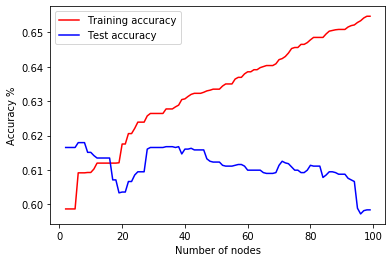

In [25]:
print_validation_curve()

La RandomizedSearchCV serve per ottimizzare i parametri di una random forest, è una specie di grid search (in quanto esplora lo stesso spazio), ma è computazionalmente molto più veloce

In [26]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i) # ritorna gli indici che non sono zero
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            #print("Number of leaves: {0}".format(results['max_leaf_nodes'][candidate]))
            print("")

In [27]:
param_list = {'max_depth': [None] + list(np.arange(2, 20)),
              'min_samples_split': [2, 5, 10, 20, 30, 50, 100], # range standard
              'min_samples_leaf': [1, 5, 10, 20, 30, 50, 100], # range standard
              'max_leaf_nodes' : [10, 15, 20, 25, 30] # derivati da sopra
             }

### Gini

In [28]:
clf_gini = DecisionTreeClassifier(criterion='gini')

random_search_gini = RandomizedSearchCV(clf_gini, param_distributions=param_list, n_iter=100, cv=5)
random_search_gini.fit(X, y)
report(random_search_gini.cv_results_, n_top=3)

Model with rank: 1
Mean validation score: 0.612 (std: 0.009)
Parameters: {'min_samples_split': 50, 'min_samples_leaf': 50, 'max_leaf_nodes': 25, 'max_depth': 16}

Model with rank: 1
Mean validation score: 0.612 (std: 0.009)
Parameters: {'min_samples_split': 30, 'min_samples_leaf': 50, 'max_leaf_nodes': 25, 'max_depth': None}

Model with rank: 3
Mean validation score: 0.612 (std: 0.009)
Parameters: {'min_samples_split': 100, 'min_samples_leaf': 30, 'max_leaf_nodes': 25, 'max_depth': 11}



### Gini unbalanced

In [29]:
clf_gini_unbalanced = DecisionTreeClassifier(criterion='gini')

random_search_gini_unbalanced = RandomizedSearchCV(clf_gini_unbalanced, param_distributions=param_list, n_iter=100, cv=5)
random_search_gini_unbalanced.fit(X_unbalanced, y_unbalanced)
report(random_search_gini_unbalanced.cv_results_, n_top=3)

Model with rank: 1
Mean validation score: 0.877 (std: 0.000)
Parameters: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_leaf_nodes': 10, 'max_depth': 12}

Model with rank: 1
Mean validation score: 0.877 (std: 0.000)
Parameters: {'min_samples_split': 100, 'min_samples_leaf': 1, 'max_leaf_nodes': 15, 'max_depth': 3}

Model with rank: 1
Mean validation score: 0.877 (std: 0.000)
Parameters: {'min_samples_split': 10, 'min_samples_leaf': 10, 'max_leaf_nodes': 10, 'max_depth': 12}

Model with rank: 1
Mean validation score: 0.877 (std: 0.000)
Parameters: {'min_samples_split': 30, 'min_samples_leaf': 5, 'max_leaf_nodes': 10, 'max_depth': 7}

Model with rank: 1
Mean validation score: 0.877 (std: 0.000)
Parameters: {'min_samples_split': 20, 'min_samples_leaf': 5, 'max_leaf_nodes': 10, 'max_depth': 15}

Model with rank: 1
Mean validation score: 0.877 (std: 0.000)
Parameters: {'min_samples_split': 100, 'min_samples_leaf': 5, 'max_leaf_nodes': 10, 'max_depth': 17}

Model with rank: 1
Mean vali

### Entropy

In [30]:
clf_entropy = DecisionTreeClassifier(criterion='entropy')

random_search_entropy = RandomizedSearchCV(clf_entropy, param_distributions=param_list, n_iter=100, cv=5)
random_search_entropy.fit(X, y)
report(random_search_entropy.cv_results_, n_top=3)

Model with rank: 1
Mean validation score: 0.612 (std: 0.010)
Parameters: {'min_samples_split': 10, 'min_samples_leaf': 50, 'max_leaf_nodes': 30, 'max_depth': 19}

Model with rank: 2
Mean validation score: 0.611 (std: 0.009)
Parameters: {'min_samples_split': 5, 'min_samples_leaf': 100, 'max_leaf_nodes': 25, 'max_depth': 9}

Model with rank: 2
Mean validation score: 0.611 (std: 0.009)
Parameters: {'min_samples_split': 20, 'min_samples_leaf': 100, 'max_leaf_nodes': 25, 'max_depth': 19}

Model with rank: 2
Mean validation score: 0.611 (std: 0.009)
Parameters: {'min_samples_split': 20, 'min_samples_leaf': 100, 'max_leaf_nodes': 25, 'max_depth': 6}



### Entropy unbalanced

In [31]:
clf_entropy_unbalanced = DecisionTreeClassifier(criterion='entropy')

random_search_entropy_unbalanced = RandomizedSearchCV(clf_entropy_unbalanced, param_distributions=param_list, n_iter=100, cv=5)
random_search_entropy_unbalanced.fit(X_unbalanced, y_unbalanced)
report(random_search_entropy_unbalanced.cv_results_, n_top=3)

Model with rank: 1
Mean validation score: 0.877 (std: 0.000)
Parameters: {'min_samples_split': 30, 'min_samples_leaf': 5, 'max_leaf_nodes': 15, 'max_depth': 8}

Model with rank: 1
Mean validation score: 0.877 (std: 0.000)
Parameters: {'min_samples_split': 100, 'min_samples_leaf': 5, 'max_leaf_nodes': 10, 'max_depth': 19}

Model with rank: 1
Mean validation score: 0.877 (std: 0.000)
Parameters: {'min_samples_split': 10, 'min_samples_leaf': 5, 'max_leaf_nodes': 25, 'max_depth': 4}

Model with rank: 1
Mean validation score: 0.877 (std: 0.000)
Parameters: {'min_samples_split': 30, 'min_samples_leaf': 1, 'max_leaf_nodes': 15, 'max_depth': 4}

Model with rank: 1
Mean validation score: 0.877 (std: 0.000)
Parameters: {'min_samples_split': 10, 'min_samples_leaf': 1, 'max_leaf_nodes': 10, 'max_depth': 15}

Model with rank: 1
Mean validation score: 0.877 (std: 0.000)
Parameters: {'min_samples_split': 10, 'min_samples_leaf': 1, 'max_leaf_nodes': 10, 'max_depth': 5}

Model with rank: 1
Mean validat

## Model Building and training

Prendiamo i migliori risultati da sopra e addestriamo i due modelli che andremo ad analizzare

In [32]:
best_gini = max(random_search_gini.cv_results_['mean_test_score'])
gini_param = {}
i=0
for param in random_search_gini.cv_results_['mean_test_score']:
    if param==best_gini:
        gini_param = random_search_gini.cv_results_['params'][i]

best_entropy = max(random_search_entropy.cv_results_['mean_test_score'])
entropy_param = {}
i=0
for param in random_search_entropy.cv_results_['mean_test_score']:
    if param==best_entropy:
        entropy_param = random_search_entropy.cv_results_['params'][i]
        
best_gini_unbalanced = max(random_search_gini_unbalanced.cv_results_['mean_test_score'])
gini_param_unbalanced = {}
i=0
for param in random_search_gini_unbalanced.cv_results_['mean_test_score']:
    if param==best_gini_unbalanced:
        gini_param_unbalanced = random_search_gini_unbalanced.cv_results_['params'][i]
        
best_entropy_unbalanced = max(random_search_entropy_unbalanced.cv_results_['mean_test_score'])
entropy_param_unbalanced = {}
i=0
for param in random_search_entropy_unbalanced.cv_results_['mean_test_score']:
    if param==best_entropy_unbalanced:
        entropy_param_unbalanced = random_search_entropy_unbalanced.cv_results_['params'][i]
        

# if best_gini < best_entropy:
#     params = random_search_entropy.cv_results_['params'][0]
#     criterion = 'entropy'
# else:
#     params = random_search_gini.cv_results_['params'][0]
#     criterion = 'gini'

print(best_gini)
print(best_entropy)
print(best_gini_unbalanced)
print(best_entropy_unbalanced)

0.611864406779661
0.6122175141242938
0.877373705842568
0.8772523108405736


### Unalanced Dataset

In [33]:
criterion = 'gini'
params = random_search_gini_unbalanced.cv_results_['params'][0]

In [34]:
clf_unbalanced = DecisionTreeClassifier(criterion=criterion, min_samples_split=params['min_samples_split'],
                             min_samples_leaf=params['min_samples_leaf'],
                             max_leaf_nodes=params['max_leaf_nodes'],
                             max_depth=params['max_depth'])
start = time.time()
clf_unbalanced = clf_unbalanced.fit(X_train_unbalanced, y_train_unbalanced)
done = time.time()
elapsed = done-start
print("Training of "+criterion+" Decision Tree took "+str(elapsed))

Training of gini Decision Tree took 1.0571718215942383


In [35]:
start = time.time()
y_pred = clf_unbalanced.predict(X_test_unbalanced)
done = time.time()
elapsed = done-start
print("Testing of "+criterion+" Decision Tree took "+str(elapsed))
y_pred_tr = clf_unbalanced.predict(X_train_unbalanced)

Testing of gini Decision Tree took 0.026928186416625977


In [36]:
importances = sorted(list(zip(attributes, clf_unbalanced.feature_importances_)), key = lambda x : x[1], reverse=True)
for col, imp in importances:
    if imp == 0:
        continue
    print(col, imp)

VehicleAge 0.5858837854955516
VehBCost 0.2705619990882965
VehOdo 0.06449296913437448
ModelSimple_EXPLORER 0.03164235250153438
ModelSimple_SORENTO 0.02758015917634834
ModelSimple_STRATUS 0.019838734603894563


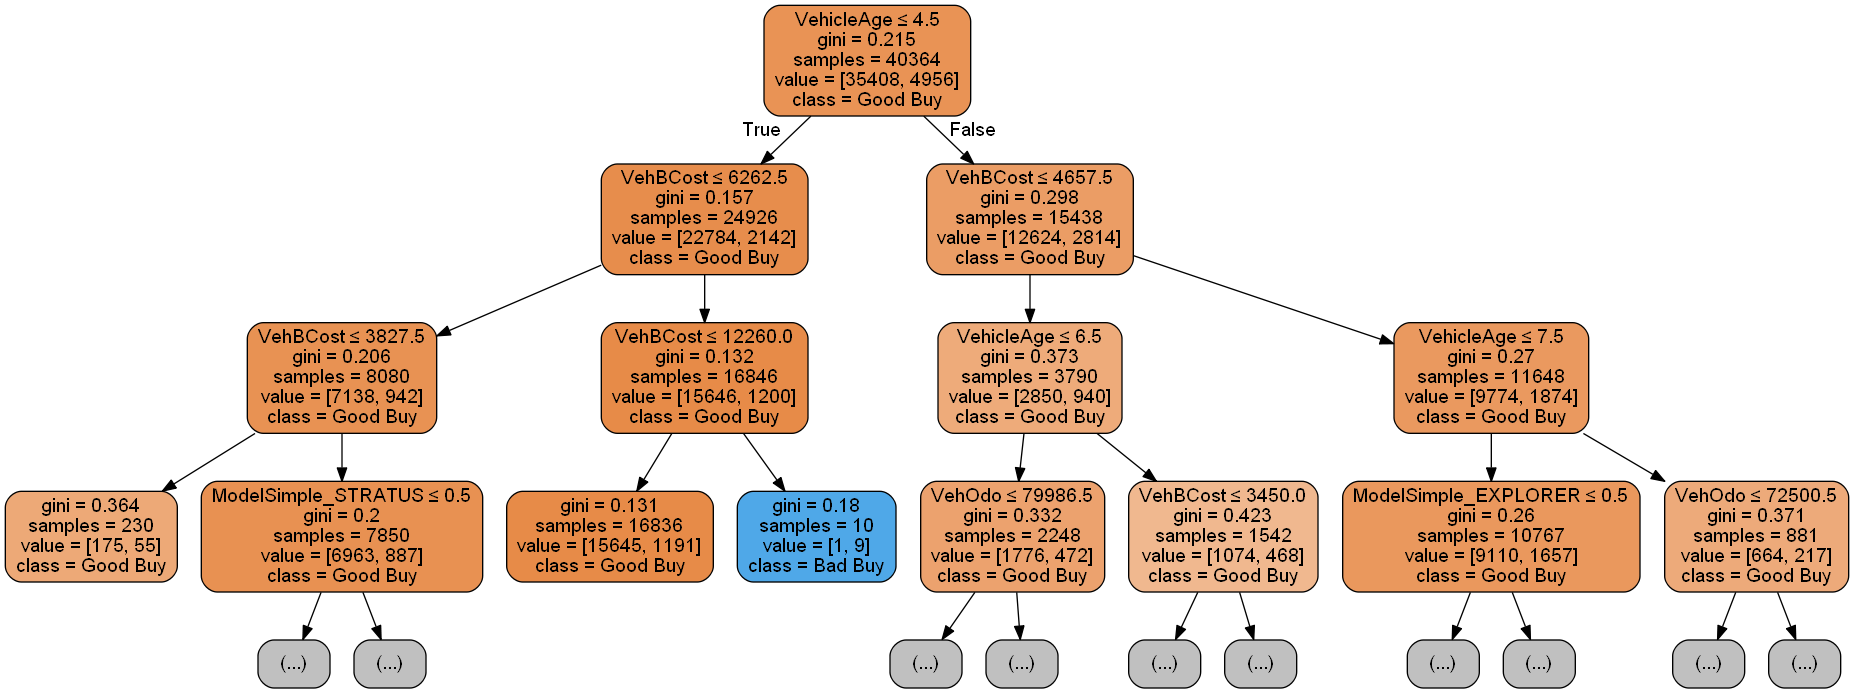

In [37]:
dot_data = tree.export_graphviz(clf_unbalanced, out_file=None,
                                feature_names=attributes,
                                class_names=['Bad Buy' if x == 1 else 'Good Buy' for x in clf_unbalanced.classes_],  
                                filled=True, rounded=True,  
                                special_characters=True,
                                max_depth=3)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

### Balanced Dataset

In [38]:
criterion = 'entropy'
params = random_search_gini.cv_results_['params'][0]

In [39]:
clf = DecisionTreeClassifier(criterion=criterion, min_samples_split=params['min_samples_split'],
                             min_samples_leaf=params['min_samples_leaf'],
                             max_leaf_nodes=params['max_leaf_nodes'],
                             max_depth=params['max_depth'])
start = time.time()
clf = clf.fit(X_train, y_train)
done = time.time()
elapsed = done-start
print("Training of "+criterion+" Decision Tree took "+str(elapsed))

Training of entropy Decision Tree took 0.18151354789733887


In [40]:
start = time.time()
y_pred = clf.predict(X_test)
done = time.time()
elapsed = done-start
print("Testing of "+criterion+" Decision Tree took "+str(elapsed))
y_pred_tr = clf.predict(X_train)

Testing of entropy Decision Tree took 0.00698542594909668


In [41]:
importances = sorted(list(zip(attributes, clf.feature_importances_)), key = lambda x : x[1], reverse=True)
for col, imp in importances:
    if imp == 0:
        continue
    print(col, imp)

VehicleAge 0.5074055874327156
VehBCost 0.2008561190053276
VehOdo 0.0626270908139782
Auction_MANHEIM 0.058516972319805204
WheelType_COVERS 0.04977419640011128
Make_CHEVROLET 0.01886969990315474
ModelSimple_SEBRING 0.018171949126226536
ModelSimple_MALIBU 0.018000088182737763
Make_DODGE 0.017783679866779294
Size_LARGE 0.01679774372838233
Size_MEDIUM 0.01658421781567499
TopThreeAmericanName_GM 0.014612655405106617


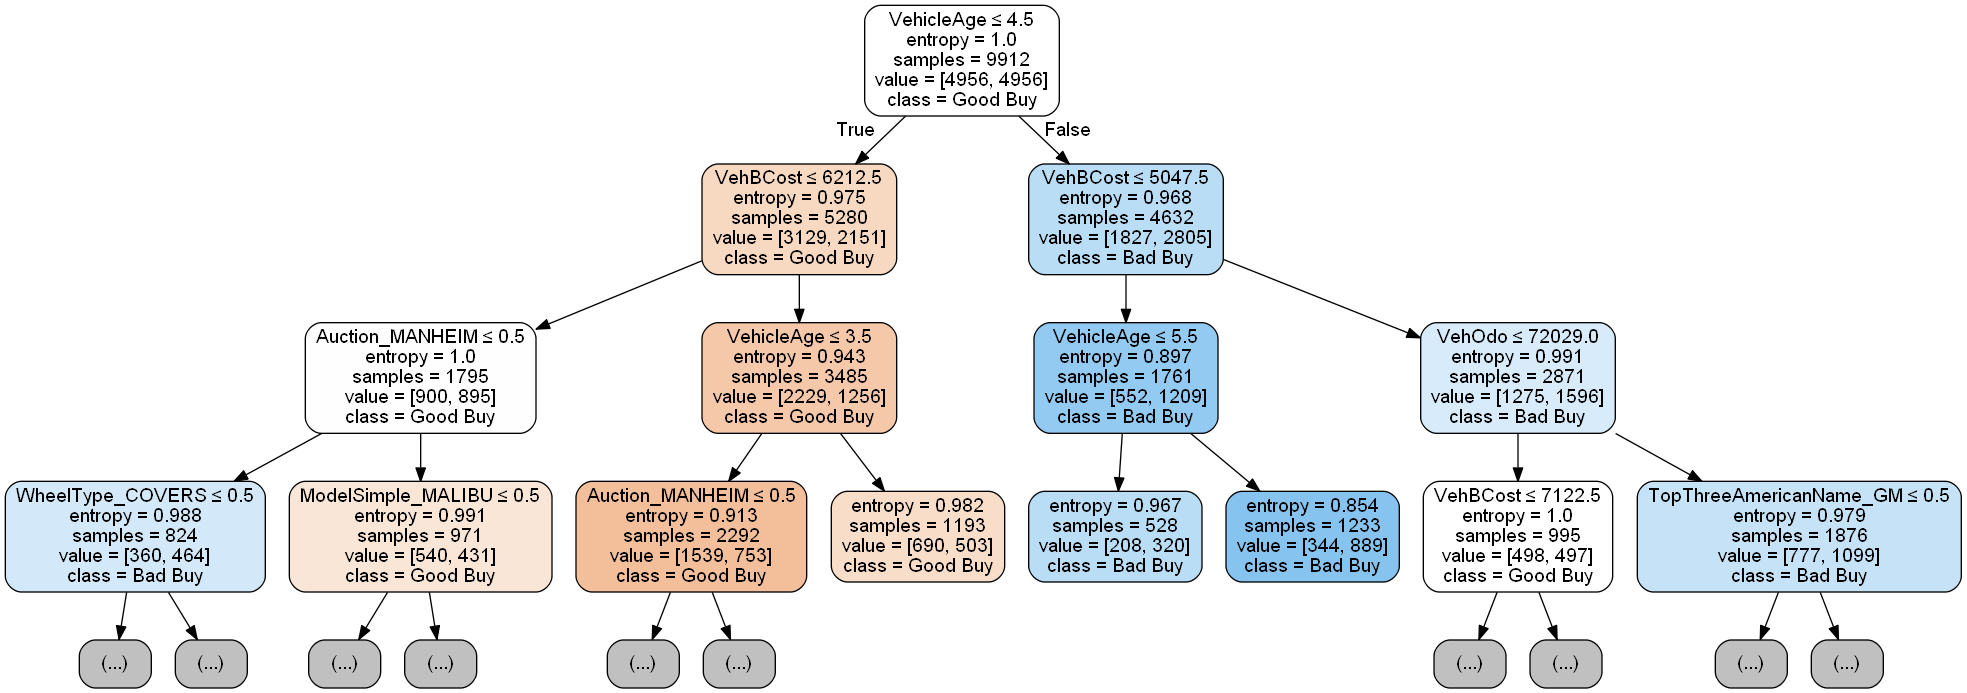

In [42]:
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=attributes,
                                class_names=['Bad Buy' if x == 1 else 'Good Buy' for x in clf.classes_],  
                                filled=True, rounded=True,  
                                special_characters=True,
                                max_depth=3)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

### Scelta miglior Decision Tree

In [43]:
clf_dt = clf

## Cross Validation score of best DT

In [44]:
from sklearn.model_selection import cross_val_score

In [45]:
scores = cross_val_score(clf_dt, X, y, cv=10)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf_dt, X, y, cv=10, scoring='recall')
print('Recall: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf_dt, X, y, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.6090 (+/- 0.03)
Recall: 0.6558 (+/- 0.10)
F1-score: 0.6073 (+/- 0.03)


# Random forest

## Validation

### Balanced

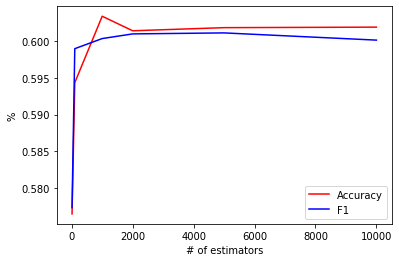

In [46]:
accuracy = []
f1 = []
interval = [10, 100, 1000, 2000, 5000, 10000]
r = tqdm(interval)
cv=2
for x in r:
    clf = RandomForestClassifier(n_estimators=x, criterion='gini')
    accuracy.append(cross_val_score(clf, X, y, cv=cv).mean())
    f1.append(cross_val_score(clf, X, y, cv=cv, scoring='f1_macro').mean())
    #scores = cross_val_score(clf, X, y, cv=10)
    #print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

    #scores = cross_val_score(clf, X, y, cv=10, scoring='f1_macro')
    #print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))
    
plt.plot(interval, accuracy, 'r', label='Accuracy')
plt.plot(interval, f1, 'b', label='F1')
plt.xlabel("# of estimators")
plt.ylabel("%")
plt.legend(loc='best')
plt.show()

### Unbalanced

In [80]:
accuracy = []
f1 = []
# Il grafico risultante provando [10, 100, 1000, 2000, 5000, 10000] è lo stesso che provando con 2000, due rette
# accuracy sul 0.87 e f1 sotto il 0.5
interval = [2000]
r = tqdm(interval)
cv=2
for x in r:
    clf = RandomForestClassifier(n_estimators=x, criterion='gini')
    accuracy.append(cross_val_score(clf, X_unbalanced, y_unbalanced, cv=cv).mean())
    f1.append(cross_val_score(clf, X_unbalanced, y_unbalanced, cv=cv, scoring='f1_macro').mean())
    
# plt.plot(interval, accuracy, 'r', label='Accuracy')
# plt.plot(interval, f1, 'b', label='F1')
# plt.xlabel("# of estimators")
# plt.ylabel("%")
# plt.legend(loc='best')
# plt.show()
print(accuracy)


[0.8728300682108538]


## Times

In [48]:
clf = RandomForestClassifier(n_estimators=2000, criterion='entropy')
start = time.time()
clf.fit(X_train, y_train)
done = time.time()
elapsed = done-start
print("Training of Random Forest took "+str(elapsed))
start = time.time()
clf.predict(X_test)
done = time.time()
elapsed = done-start
print("Testing of Random Forest took "+str(elapsed))

Training of Random Forest took 53.03417444229126
Testing of Random Forest took 2.245415449142456


# KNN

## Validation

In [49]:
def print_knn_curve(max=10): # ci mette circa 1 minuto per numero
    accuracy = []
    recall = []
    f1 = []
    tr_error = []
    interval = range(2, max)
    r = tqdm(interval)
    for x in r:
        clf = KNeighborsClassifier(n_neighbors=x)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        y_pred_tr = clf.predict(X_train)
        accuracy.append(cross_val_score(clf, X, y, cv=10, scoring='accuracy').mean())
        recall.append(cross_val_score(clf, X, y, cv=10, scoring='recall').mean())
        f1.append(cross_val_score(clf, X, y, cv=10, scoring='f1_macro').mean())
        tr_error.append(accuracy_score(y_pred_tr, y_train))

    plt.plot(interval, accuracy, 'r', label='Test Accuracy')
    plt.plot(interval, recall, 'b', label='Recall')
    plt.plot(interval, f1, 'g', label='f1')
    plt.plot(interval, tr_error, 'y', label="Trainig Accuracy")
    plt.xlabel("K")
    plt.ylabel("%")
    plt.legend(loc='best')
    plt.show()

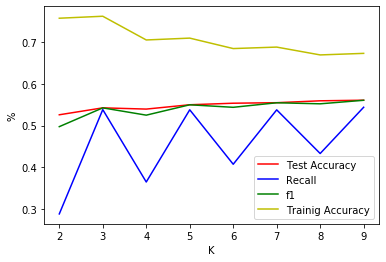

In [50]:
print_knn_curve()

## Times

In [51]:
#3 sembra essere il valore migliore
# misuro solo un traning e un testing, ma le measure le derivo con una cross validation
clf = KNeighborsClassifier(n_neighbors=3)
start = time.time()
clf.fit(X_train, y_train)
done = time.time()
elapsed = done-start
print("Training of KNN took "+str(elapsed))
start = time.time()
clf.predict(X_test)
done = time.time()
elapsed = done-start
print("Testing of KNN took "+str(elapsed))
score = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))
score = cross_val_score(clf, X, y, cv=10, scoring='recall')
print('Recall: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))
score = cross_val_score(clf, X, y, cv=10, scoring='f1_macro')
print('F1: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Training of KNN took 0.17155814170837402
Testing of KNN took 0.6432037353515625
Accuracy: 0.6073 (+/- 0.03)
Recall: 0.6073 (+/- 0.03)
F1: 0.6073 (+/- 0.03)


# Naive Bayes

## Balanced dataset

In [52]:
gnb = GaussianNB()
start = time.time()
gnb.fit(X_train, y_train)
done = time.time()
elapsed = done-start
print("Training of NB took "+str(elapsed))
start = time.time()
gnb.predict(X_test)
done = time.time()
elapsed = done-start
print("Testing of NB took "+str(elapsed))
scores = cross_val_score(gnb, X, y, cv=10)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(gnb, X, y, cv=10, scoring='recall')
print('Recall: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X, y, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Training of NB took 0.08776497840881348
Testing of NB took 0.0498661994934082
Accuracy: 0.6079 (+/- 0.03)
Recall: 0.4910 (+/- 0.04)
F1-score: 0.5423 (+/- 0.02)


## Unbalanced dataset and prior

In [53]:
unique, counts = np.unique(y_unbalanced, return_counts=True)
n = len(y_unbalanced)
priors = counts/n
priors

array([0.87721763, 0.12278237])

In [54]:
gnb = GaussianNB()#priors=priors)

# Analisi del tempo
start = time.time()
gnb.fit(X_train_unbalanced, y_train_unbalanced)
done = time.time()
elapsed = done-start
print("Training of NB took "+str(elapsed))
start = time.time()
gnb.predict(X_test_unbalanced)
done = time.time()
elapsed = done-start

# Validation score
print("Testing of NB took "+str(elapsed))
scores = cross_val_score(gnb, X_unbalanced, y_unbalanced, cv=10)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(gnb, X_unbalanced, y_unbalanced, cv=10, scoring='recall')
print('Recall: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(gnb, X_unbalanced, y_unbalanced, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

gnb_priors = gnb

Training of NB took 0.3530571460723877
Testing of NB took 0.17353558540344238
Accuracy: 0.8669 (+/- 0.00)
Recall: 0.0590 (+/- 0.02)
F1-score: 0.5132 (+/- 0.01)


# SVM

## Balanced data

In [55]:
X_num.shape

(14160, 4)

In [56]:
# l'output è sotto
def calcolopesante2():
    clf_balanced = svm.SVC()
    start = time.time()
    clf_balanced.fit(X_num_train, y_num_train)
    done = time.time()
    elapsed = done-start
    print("Training of SVM took "+str(elapsed))
    start = time.time()
    clf_balanced.predict(X_num_test)
    done = time.time()
    elapsed = done-start
    print("Testing of SVM took "+str(elapsed))
    kernels = ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
    cv=2
    for kernel in kernels:
        print(kernel)
        clf_balanced = svm.SVC(kernel=kernel)
        scores = cross_val_score(clf_balanced, X_num, y_num, cv=cv)
        print('\t'+'Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

        scores = cross_val_score(clf_balanced, X_num, y_num, cv=cv, scoring='recall')
        print('\t'+'Recall: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

        scores = cross_val_score(clf_balanced, X_num, y_num, cv=cv, scoring='f1_macro')
        print('\t'+'F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

In [57]:
# Training of SVM took 5.959143400192261
# Testing of SVM took 1.8512444496154785
# linear
# 	Accuracy: 0.6018 (+/- 0.02)
# 	Recall: 0.6143 (+/- 0.03)
# 	F1-score: 0.6018 (+/- 0.02)
# poly

## Unbalanced data

In [58]:
# Non è possibile eseguire questo blocco in quanto richiede un tempo esagerato
def calcolopesante():
    clf = svm.SVC() # X_num_unbalanced_train
    start = time.time()
    clf.fit(X_num_unbalanced_train, y_num_unbalanced_train)
    done = time.time()
    elapsed = done-start
    print("Training of SVM took "+str(elapsed))
    start = time.time()
    clf.predict(X_num_unbalanced_test)
    done = time.time()
    elapsed = done-start
    print("Testing of SVM took "+str(elapsed))
    kernels = ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
    cv=2
    for kernel in kernels:
        print(kernel)
        clf = svm.SVC(kernel=kernel)
        scores = cross_val_score(clf, X_num_unbalanced, y_num_unbalanced, cv=cv)
        print('\t'+'Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

        scores = cross_val_score(clf, X_num_unbalanced, y_num_unbalanced, cv=cv, scoring='recall')
        print('\t'+'Recall: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

        scores = cross_val_score(clf, X_num_unbalanced, y_num_unbalanced, cv=cv, scoring='f1_macro')
        print('\t'+'F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

# Applicazione modello migliore sul caravana_test_set

## Preparazione dataset

In [59]:
clf = clf_dt

In [60]:
data = pd.read_csv('data/test.csv')
data.head()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,ModelSimple,Doors,USRegion
0,5951,0,10/26/2010,MANHEIM,2003,7,CHEVROLET,AVALANCHE 1500 2WD V,150,SUV-PICKUP 5.3L,...,GREEN,835,85040,AZ,11390.0,0,1572,AVALANCHE 1500,4D,West
1,42116,0,1/27/2010,OTHER,2006,4,FORD,MUSTANG V6,BAS,COUPE,...,NaN,17675,27407,NC,7700.0,0,803,MUSTANG,2D,South
2,5554,0,9/3/2009,MANHEIM,2004,5,DODGE,STRATUS V6,ES,SEDAN,...,NaN,99740,85040,AZ,5700.0,0,1389,STRATUS,4D,West
3,25195,0,1/21/2010,OTHER,2004,6,HYUNDAI,TIBURON,BAS,COUPE,...,NaN,3453,80229,CO,5155.0,0,920,TIBURON,2D,West
4,51232,0,3/18/2009,MANHEIM,2004,5,CHEVROLET,TRAILBLAZER 2WD 6C 4,NOR,SUV 4.2L LT,...,NaN,22916,80011,CO,6785.0,0,1155,TRAILBLAZER,4D,West


In [61]:
# Eliminazioni dati rindondanti
del data['MMRCurrentRetailCleanPrice']
del data['MMRCurrentRetailAveragePrice']
del data['MMRCurrentAuctionCleanPrice']
del data['MMRCurrentAuctionAveragePrice']
del data['MMRAcquisitonRetailCleanPrice']
del data['MMRAcquisitionAuctionAveragePrice']
del data['MMRAcquisitionAuctionCleanPrice']
del data['MMRAcquisitionRetailAveragePrice']
del data['Model'] # c'è ModelSimple
del data['VNST'] # c'è USRegion

# Eliminazione dati irrilevanti
del data['RefId']
del data['PurchDate'] # ?
del data['IsOnlineSale']

# Eliminazioni dati con troppi valori unici
del data['SubModel']

# Eliminazionoi dati avanzati dalla preparation
del data['VNZIP1']
del data['BYRNO']
del data['AUCGUART']
del data['PRIMEUNIT']
del data['WheelTypeID']

In [62]:
data.head()

,IsBadBuy,Auction,VehYear,VehicleAge,Make,Trim,Color,Transmission,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,VehBCost,WarrantyCost,ModelSimple,Doors,USRegion
0,0,MANHEIM,2003,7,CHEVROLET,150,BLUE,AUTO,Alloy,71991,AMERICAN,LARGE TRUCK,GM,11390.0,1572,AVALANCHE 1500,4D,West
1,0,OTHER,2006,4,FORD,BAS,BLACK,MANUAL,Alloy,73815,AMERICAN,SPORTS,FORD,7700.0,803,MUSTANG,2D,South
2,0,MANHEIM,2004,5,DODGE,ES,WHITE,AUTO,Alloy,74213,AMERICAN,MEDIUM,CHRYSLER,5700.0,1389,STRATUS,4D,West
3,0,OTHER,2004,6,HYUNDAI,BAS,BLUE,MANUAL,Alloy,77980,OTHER ASIAN,SPORTS,OTHER,5155.0,920,TIBURON,2D,West
4,0,MANHEIM,2004,5,CHEVROLET,NOR,GREEN,AUTO,Alloy,77819,AMERICAN,MEDIUM SUV,GM,6785.0,1155,TRAILBLAZER,4D,West


In [63]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
data_str = data.copy(deep=True).select_dtypes(exclude=numerics)
for column in data_str.columns:
    dummies = pd.get_dummies(data_str[column], drop_first=True)
    for value in dummies.columns:
        data[str(column)+'_'+str(value)] = dummies[value]
    del data[column]
data.head()

,IsBadBuy,VehYear,VehicleAge,VehOdo,VehBCost,WarrantyCost,Auction_MANHEIM,Auction_OTHER,Make_BUICK,Make_CADILLAC,...,ModelSimple_XL-7,ModelSimple_XTERRA,ModelSimple_YARIS,ModelSimple_YUKON,ModelSimple_YUKON XL 1500,ModelSimple_ZEPHYR,Doors_4D,USRegion_NorthEast,USRegion_South,USRegion_West
0,0,2003,7,71991,11390.0,1572,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,0,2006,4,73815,7700.0,803,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,2004,5,74213,5700.0,1389,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,2004,6,77980,5155.0,920,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,2004,5,77819,6785.0,1155,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [64]:
data.isnull().sum()

IsBadBuy                       0
VehYear                        0
VehicleAge                     0
VehOdo                         0
VehBCost                       0
WarrantyCost                   0
Auction_MANHEIM                0
Auction_OTHER                  0
Make_BUICK                     0
Make_CADILLAC                  0
Make_CHEVROLET                 0
Make_CHRYSLER                  0
Make_DODGE                     0
Make_FORD                      0
Make_GMC                       0
Make_HONDA                     0
Make_HYUNDAI                   0
Make_INFINITI                  0
Make_ISUZU                     0
Make_JEEP                      0
Make_KIA                       0
Make_LEXUS                     0
Make_LINCOLN                   0
Make_MAZDA                     0
Make_MERCURY                   0
Make_MINI                      0
Make_MITSUBISHI                0
Make_NISSAN                    0
Make_OLDSMOBILE                0
Make_PLYMOUTH                  0
          

Dobbiamo fare in modo che il test abbia lo stesso numero di colonne che aveva il training. Il traning ha delle colonne in pi che sono le seguenti

In [65]:
# Tolgo le colonne di troppo nel test set
for column in data.columns:
    if column not in initial_columns:
        del data[column]
        
# Guardo quali sono le colonne mancanti
missing_columns = []
for column in initial_columns:
    if column not in data.columns:
        missing_columns.append(column)

In [66]:
for column in missing_columns:
    data[column] = 0

In [71]:
attributes = [col for col in data.columns if col != 'IsBadBuy']
X = data[attributes].values
y = data['IsBadBuy']

In [72]:
y_pred = clf.predict(X)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.57      0.70     12829
           1       0.17      0.64      0.27      1768

    accuracy                           0.58     14597
   macro avg       0.54      0.60      0.49     14597
weighted avg       0.83      0.58      0.65     14597



## Testing

In [73]:
print('Accuracy %s' % accuracy_score(y, y_pred))
print('F1-score %s' % f1_score(y, y_pred, average=None))

Accuracy 0.5792971158457217
F1-score [0.70474542 0.26849315]


In [74]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.57      0.70     12829
           1       0.17      0.64      0.27      1768

    accuracy                           0.58     14597
   macro avg       0.54      0.60      0.49     14597
weighted avg       0.83      0.58      0.65     14597



In [75]:
confusion_matrix(y, y_pred)

array([[7329, 5500],
       [ 641, 1127]], dtype=int64)

## Analisi del ROC e AUC

In [76]:
from sklearn.preprocessing import LabelBinarizer

In [77]:
lb = LabelBinarizer()
lb.fit(y)
lb.classes_.tolist()

[0, 1]

In [78]:
fpr = dict()
tpr = dict()
roc_auc = dict()
by_test = lb.transform(y) # shape is (16260, 1)
by_pred = lb.transform(y_pred) # shape is (16260, 1)
for i in range(1):
    fpr[i], tpr[i], _ = roc_curve(by_test[:, i], by_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
roc_auc = roc_auc_score(by_test, by_pred, average=None)
roc_auc

0.6043636245158646

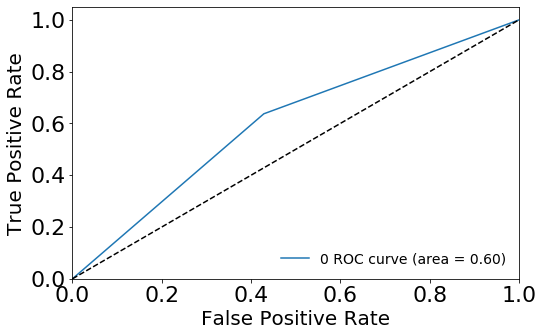

In [79]:
plt.figure(figsize=(8, 5))
for i in range(1):
    plt.plot(fpr[i], tpr[i], 
             label='%s ROC curve (area = %0.2f)' % (lb.classes_.tolist()[i], roc_auc))
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20) 
plt.tick_params(axis='both', which='major', labelsize=22)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.show()